<a href="https://colab.research.google.com/github/mazdakdev/AI-Bootcamp/blob/main/Tensorflow_Fashion_Mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

### Downloading Dataset
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.



In [3]:
fmnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


#### Train/Test/Validation

*   Train : 55000 Data
*   Test: 10000 Data
*   Validation: 5000 Data




In [4]:
(X_train_validation, y_train_validation), (X_test, y_test) = fmnist

In [5]:
X_train, y_train = X_train_validation[:-5000], y_train_validation[:-5000]
X_validation, y_validation = X_train_validation[-5000:], y_train_validation[-5000:]

In [6]:
X_train, X_valid, X_test = X_train/255, X_validation/255, X_test/255

In [7]:
from tensorflow import keras
from keras import layers as ly

model = keras.Sequential()
model.add(ly.Input(shape=[28, 28]))
model.add(ly.Flatten())
model.add(ly.Dense(100, activation="relu"))
model.add(ly.Dense(100, activation="relu"))
model.add(ly.Dense(100, activation="relu"))
model.add(ly.Dense(10, activation="softmax"))

In [8]:
model.layers[1].get_weights()

[array([[-0.03781221, -0.07071225,  0.01216424, ..., -0.01371244,
          0.05107437,  0.01710454],
        [ 0.07967365, -0.03189553,  0.04227684, ..., -0.03838099,
          0.03299464, -0.00092935],
        [ 0.00295646,  0.06890377, -0.06057563, ..., -0.07209859,
          0.07718627,  0.06114943],
        ...,
        [ 0.04737118,  0.02380785,  0.0473948 , ..., -0.06216002,
          0.0163663 ,  0.0037889 ],
        [-0.03773647,  0.03814179, -0.01783969, ..., -0.06442286,
          0.02024252, -0.00100961],
        [-0.02077924,  0.00751349,  0.04496579, ..., -0.02133105,
          0.06310031, -0.00036032]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [9]:
model.compile(loss="sparse_categorical_crossentropy" , optimizer="sgd", metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=15,
          validation_data=(X_validation, y_validation))

Epoch 1/15
1719/1719 [==============================] - 15s 8ms/step - loss: 0.8062 - accuracy: 0.7188 - val_loss: 66.6388 - val_accuracy: 0.7882
Epoch 2/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5080 - accuracy: 0.8227 - val_loss: 69.4364 - val_accuracy: 0.8074
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4512 - accuracy: 0.8422 - val_loss: 66.8206 - val_accuracy: 0.8142
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4197 - accuracy: 0.8518 - val_loss: 84.8981 - val_accuracy: 0.8082
Epoch 5/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3980 - accuracy: 0.8598 - val_loss: 70.0683 - val_accuracy: 0.8222
Epoch 6/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3799 - accuracy: 0.8657 - val_loss: 69.0733 - val_accuracy: 0.8248
Epoch 7/15
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3652 - accuracy: 0.8691 - val_loss: 72.8064 - val_a

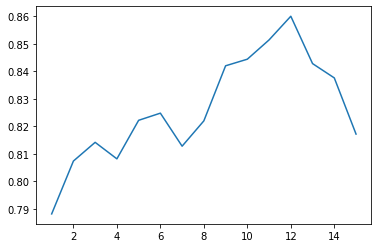

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(1,15,15), history.history["val_accuracy"])

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3930 - accuracy: 0.8578


[0.39297711849212646, 0.8578000068664551]

In [16]:
model.predict(X_test[:3]).argmax(axis=-1)

1/1 [==============================] - 0s 74ms/step


array([9, 2, 1])

In [14]:
y_test[:3]

array([9, 2, 1], dtype=uint8)